# Аналитика в авиакомпании (шаг №4)


СПРИНТ 6

<a name="title"></a>
### Содержание

[Описание проекта](#info)
1. [Открытие данных](#start)
2. [Подготовка данных](#preprocessing)
  - [model](#model)
  - [city](#city)  
3. [Анализ данных](#analitika)
  - [ТОП-10 городов](#top-10)
  - [Модели самолетов и количество рейсов](#by_model)
  - [Города и количество рейсов](#by_cites)
4. [Общий вывод](#general)

<a name="info"></a>
# Описание проекта

У нас есть 2 набора данных, в которых содержатся результаты запросов из предыдущих заданий Проекта.

**/datasets/query_1.csv** - информация о: model — модели самолета, flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года;

**/datasets/query_3.csv** — информация о: city — городах, average_flights — среднем количестве рейсов, прибывающих в город за день в августе 2018 года.
    
**Для этих двух наборов данных нужно**:
  - импортировать файлы;
  - изучить данные в них;
  - проверить типы данных на корректность;
  - выбрать топ-10 городов по количеству рейсов;
  - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
  - сделать выводы по каждому из графиков, пояснить результат.

[к содержанию...](#title)

<a name="start"></a>
# Открытие данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
model = pd.read_csv('datasets/query_1.csv')
city = pd.read_csv('datasets/query_3.csv')

[к содержанию...](#title)

<a name="preprocessing"></a>
# Подготовка данных

<a name="model"></a>
## 'model'

In [3]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
model.describe()

,flights_amount
count,8.00
mean,"2,035.62"
std,"1,965.20"
min,300.00
25%,605.25
50%,795.00
75%,"4,250.25"
max,"4,557.00"


#### Заключение: 
Данные получены нами на более ранней стадии проекта, замечаний к данным нет, типы данных корректны. 

<a name="city"></a>
## 'city'

In [6]:
city.sample(10)

,city,average_flights
33,Красноярск,11.58
29,Киров,6.00
56,Норильск,2.29
53,Новокузнецк,6.03
61,Орск,1.59
42,Мирный,6.29
32,Краснодар,3.90
69,Самара,3.00
62,Пенза,4.00
26,Калининград,2.58


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
city.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


#### Данных более сотни, визуализируем распределение:

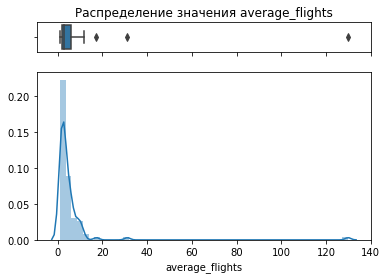

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(city["average_flights"], ax=ax_box)
sns.distplot(city["average_flights"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения average_flights')
ax_box.set(xlabel='')
plt.show()

#### Посмотрим на выбросы...

In [10]:
city.query('average_flights >15')

,city,average_flights
43,Москва,129.77
54,Новосибирск,17.32
70,Санкт-Петербург,31.16


Вполне логично, распределение близко к нормальному, плюс имеем три выброса: "Две столицы и ворота Сибири" 

#### Заключение:
Данные так же были получены нами раннее, замечаний к данным нет, типы данных корректны.

### Вывод

Сбор данных произведен нами качественно, поэтому на данном шаге дополнительная предобработка не требуется.

[к содержанию...](#title)

<a name="analitika"></a>
# Анализ данных

<a name="top-10"></a>
## ТОП-10 городов по количеству рейсов

In [11]:
top_10 = city.sort_values(by = 'average_flights', ascending=False).head(10)
top_10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [12]:
total_flights = city['average_flights'].sum()
total_flights_10 = top_10['average_flights'].sum()
q = total_flights_10 / total_flights
print('ТОП-10 рейтинга полетов покрывает {:.1%} всех полетов за день ({:.0f})'.format(q, total_flights) )

ТОП-10 рейтинга полетов покрывает 45.2% всех полетов за день (555)


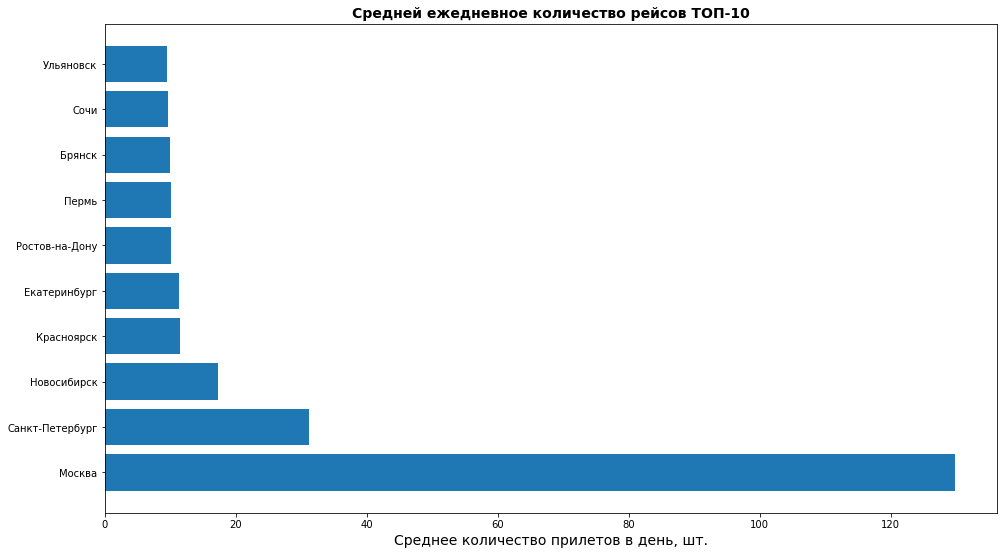

In [13]:
plt.figure(figsize=(16,9))
plt.barh(top_10['city'], top_10['average_flights'])
plt.title('Средней ежедневное количество рейсов ТОП-10',  fontsize=14, fontweight='bold')
plt.xlabel('Среднее количество прилетов в день, шт.', fontsize=14)
plt.show()

### Вывод:
1. Как и ожидалось первые места занимают столицы, миллионники и крупные транспортные узлы.

2. Пермь, Брянск, Ульяновск - города транзита (получается соответственно: Восток, Запад, Север.)
3. Ну, а Сочи - у нас все таки "цифирки" за август...
4. Отметим и обязательно запомним то факт, что 45% рейсов захватывают наши ТОП-10. На практике это может означать, что основная масса аэропортов как раз и поставляет пассажиропоток в наши ТОП-10, которые далее транзитят его между собой.

[к содержанию...](#title)

<a name="by_model"></a>
## Модели самолетов и количество рейсов

In [14]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


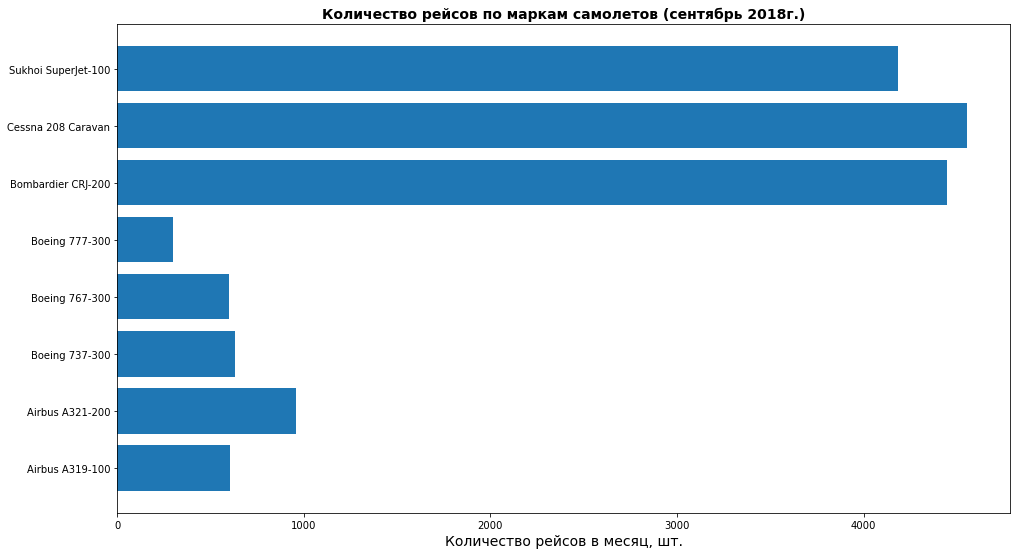

In [15]:
plt.figure(figsize=(16,9))
plt.barh(model['model'], model['flights_amount'])
plt.title('Количество рейсов по маркам самолетов (сентябрь 2018г.)',  fontsize=14, fontweight='bold')
plt.xlabel('Количество рейсов в месяц, шт.', fontsize=14)
plt.show()

### Вывод
В целом имеем достаточно понятные и прогнозируемый расклад, который неплохо перекликается с выводами предыдущего раздела:

1. Боинги и аэрбасы - в одинаковой пропорции, закрывают крупные рейсы связывающие миллионники, столицы и хабы. Таких рейсов естественно меньше, но они объемнее по пассажиропотоку (которые еще необходимо собрать). 
2. Дальше в бой идут Бомбардье и видимо уже теснящие их Суперджеты - которые осуществляют транзит из менее крупных аэропортов в более крупные хабы.
3. Ну и для полноты картины замыкают, точнее начинают всю эту цепочку "газельки" - Сесны.

[к содержанию...](#title)

<a name="by_cites"></a>
## Города и количество рейсов

**Посмотрим на распределение и отобразим его на графике, ограничив для наглядности диапазон оси Х значением 15** (С право остались Москва, Петербург, Новосибирск).

In [16]:
city["average_flights"].describe()

count   101.00
mean      5.49
std      13.12
min       1.00
25%       2.00
50%       3.00
75%       5.87
max     129.77
Name: average_flights, dtype: float64

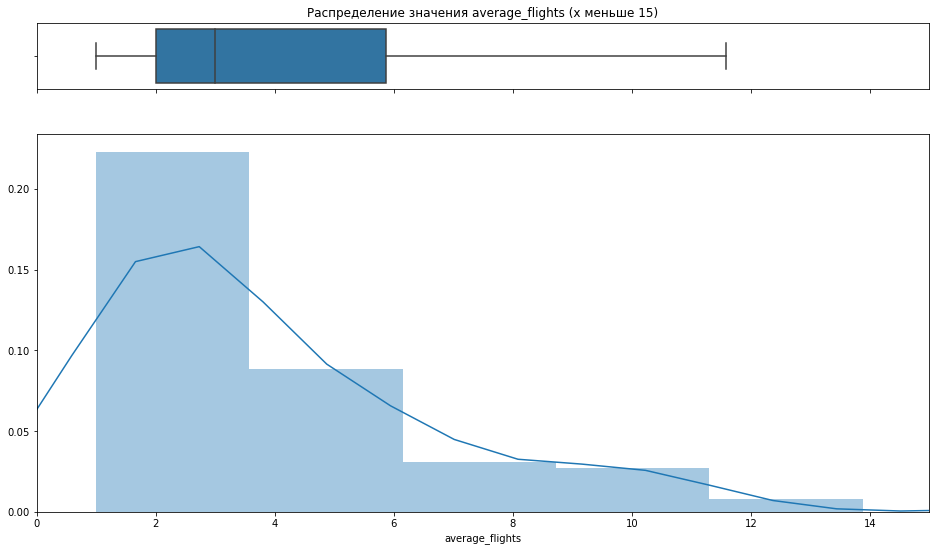

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(16,9), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.xlim(0, 15)
sns.boxplot(city["average_flights"], ax=ax_box)
sns.distplot(city["average_flights"], ax=ax_hist, hist=True, kde=True)
ax_box.set(title='Распределение значения average_flights (х меньше 15)')
ax_box.set(xlabel='')
plt.show()

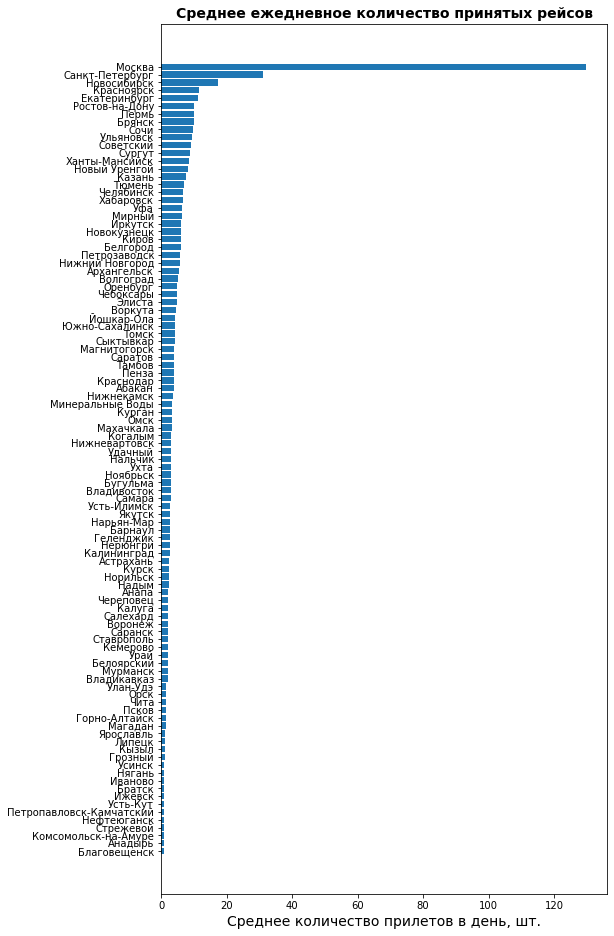

In [18]:
plt.figure(figsize=(8,16))
plt.barh(city.sort_values(by = 'average_flights')['city'], city.sort_values(by = 'average_flights')['average_flights'])
plt.title('Среднее ежедневное количество принятых рейсов',  fontsize=14, fontweight='bold')
plt.xlabel('Среднее количество прилетов в день, шт.', fontsize=14)
plt.show()

### Вывод:
1. Основная масса российских аэропортов принимает всего 3 вылета в день.

2. Среднее значение находится в районе 75 квартиля.
3. Распределение близко к нормальному и имеет тяжелый правый хвост, который обеспечивают города ТОП-10 закрывающие почти 50% полетов.

[к содержанию...](#title)

<a name="general"></a>
# Общий вывод

Резюмируем промежуточные выводы:
0. Не смотря на высокое качество подготовленных нами данных, их объема недостаточно для полноценного исследования. Но в рамках данной работы этого и не  требуется, поэтому позволим себе воспользоваться экспертной оценкой автора, имеющего крайне богатый опыт авиоперелетов по нашей необъятной Родине.
1. Российские аэропорты принимаю в среднем **555 внутренних рейсов в день** (сделаем предположение, что примерно такое же количество рейсов и отправляются из них). При этом подавляющее **большинство аэропортов** принимает **только 3 рейса в день.
2. **Основное количество (45%)** принимаемых рейсов аккумулируют на себе **10 аэропортов**: 
* первые места столицы:**Москва, Питер, Новосиб**,  а далее **крупные транспортные узлы**.
* из общей картинки выбивается только **Сочи**, но это курорт, а данные у нас за август.
3. **Боинги** и **Аэрбасы** - примерно в одинаковой пропорции, закрывают крупные рейсы связывающие миллионники и транспортные хабы. Менее крупные региональные рейсы обслуживаются с помощью **Бомбардье** и **Суперджетов** - которые осуществляют транзит из менее крупных аэропортов в более крупные хабы. Кстати, производство Бомбардье CRJ-200, прекращено в середине нулевых, поэтому у Суперджета есть все шансы со временем вытеснить и заменить его. Совсем маленькие рейсы закрывают **Сеснами**.



[к содержанию...](#title)